In [2]:
import numpy as np  # For numerical computations
from scipy.optimize import minimize  # For numerical optimization
from sklearn.datasets import make_regression  # For generating synthetic datasets
from sklearn.linear_model import LinearRegression, Ridge  # For linear and ridge regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial feature generation
from sklearn.metrics import mean_squared_error  # For calculating mean squared error
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations

# Synthetic Data Generation

X shape: (2502, 1)
y shape: (2502,)


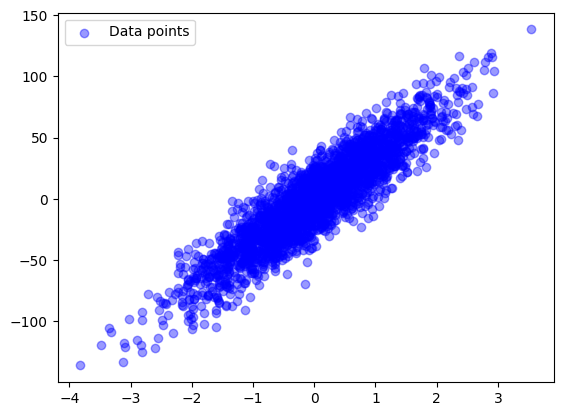

In [3]:
X, y = make_regression(n_samples=2502, n_features=1, noise=16, random_state=259202)

print("X shape:", X.shape) # X is N samples by D features (N x D)
print("y shape:", y.shape) # y is N samples by 1 (N x 1)

plt.scatter(X, y, color='blue', alpha=0.4, label='Data points')
plt.legend()
plt.show()

# Analytical Linear Regression
Formula: w = (X^T X)^(-1) X^T y

w: [-0.05959016 35.32283381]


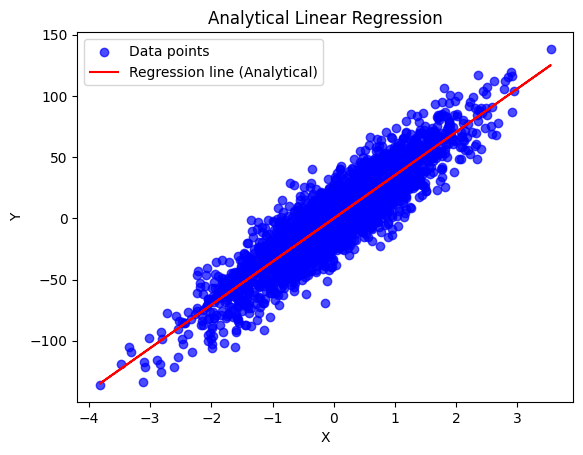

In [16]:
def analytical_linear_regression(X, y):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X]) # after bias X is N x (D+1)

    # print("X_bias shape:", X_bias.shape)
    # print("First few rows of X_bias:\n", X_bias[:3])

    X_transpose = X_bias.T # X^T is (D+1) x N

    # 2xN @ Nx2 = 2x2, 2x2 @ 2xN = 2xN, 2xN @ Nx1 = 2x1
    w = np.linalg.inv(X_transpose @ X_bias) @ X_transpose @ y
    return w


weights = analytical_linear_regression(X, y)
print("w:", weights)

X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
y_pred = X_bias @ weights

plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line (Analytical)')
plt.title("Analytical Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Numerical Linear Regression
Loss function L(w) = (1/N) * (y - X^T w)^T * (y - X^T w).

w: [-0.05959002 35.32283381]
Iterations: 3
Evaluations 117


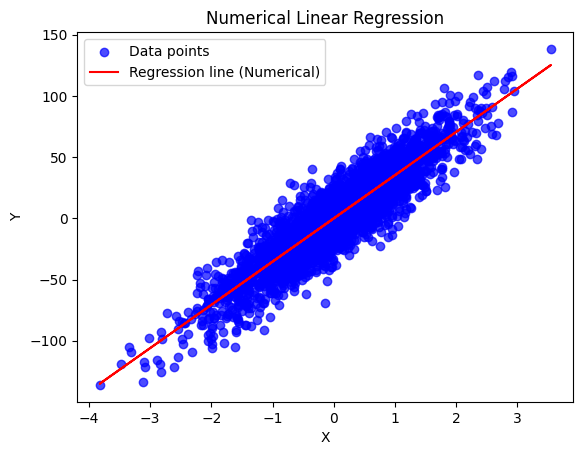

In [ ]:
def loss_function(w, X, y):
    # N x D+1 = 2502 x 2
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # 2502 x 2 @ 2 x 1 = 2502 x 1
    y_pred = X_bias @ w

    residuals = y - y_pred
    
    N = len(y)        # square errors
    loss = (1 / N) * (residuals.T @ residuals)
    return loss

# 2 x 1
# initial_weights = np.zeros(X.shape[1] + 1)

result = minimize(
    fun=loss_function,
    #x0=initial_weights,
    x0=[100,-50],
    args=(X, y),
    method='Powell'
)

numerical_weights = result.x

print("w:", numerical_weights)
print("Iterations:", result.nit)
print("Evaluations", result.nfev)

X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
y_pred_numerical = X_bias @ numerical_weights

plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.plot(X, y_pred_numerical, color='red', label='Regression line (Numerical)')
plt.title("Numerical Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [23]:
import time

start_time = time.time()
for _ in range(1000):
    analytical_weights = analytical_linear_regression(X, y)
analytical_time = time.time() - start_time

start_time = time.time()
for _ in range(1000): 
    result = minimize(fun=loss_function, x0=[0,0], args=(X, y), method='Powell')
    numerical_weights = result.x
numerical_time = time.time() - start_time

print(f"Analytical time: {analytical_time:.6f} s")
print(f"Numerical time: {numerical_time:.6f} s")
print(f"Analitycal method is : {numerical_time/analytical_time:.2f}x faster than numerical method")

Analytical time: 0.100390 s
Numerical time: 0.961550 s
Analitycal method is : 9.58x faster than numerical method
